In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# synthetic datset generation

np.random.seed(0)
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(0, 0.3, 100) 
X = X[:, np.newaxis]

In [3]:
#train, test, split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
# high bias / low variance model (Linear Regression)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_train = lin_model.predict(X_train)
y_pred_test = lin_model.predict(X_test)

In [5]:
# low bias / high variance model (Polynomial Regression)

poly_model = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_train_poly = poly_model.predict(X_train)
y_pred_test_poly = poly_model.predict(X_test)

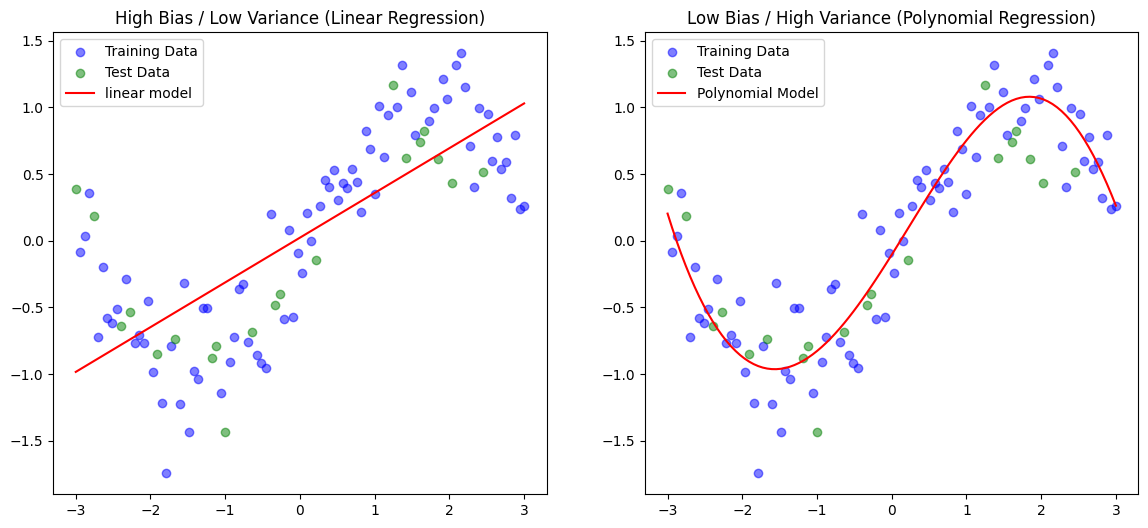

In [6]:
#plotting 

plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.scatter(X_train, y_train, label = 'Training Data', color = 'blue', alpha = 0.5)
plt.scatter(X_test, y_test, label = 'Test Data', color = 'green', alpha = 0.5)
plt.plot(X, lin_model.predict(X), color = 'red', label = "linear model")
plt.title("High Bias / Low Variance (Linear Regression)")
plt.legend()


plt.subplot(1,2,2)
plt.scatter(X_train, y_train, label = 'Training Data', color = 'blue', alpha = 0.5)
plt.scatter(X_test, y_test, label = 'Test Data', color = 'green', alpha = 0.5)
plt.plot(np.linspace(-3,3, 100), poly_model.predict(np.linspace(-3, 3, 100)[:, np.newaxis]), color = "red", label = 'Polynomial Model')
plt.title("Low Bias / High Variance (Polynomial Regression)")
plt.legend()

plt.show()

In [7]:
# Print mean squared error for both models

print(f"Linear Model Training MSE: {mean_squared_error(y_train, y_pred_train)}")
print(f"Linear Model Test MSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"Polynomial Model Training MSE: {mean_squared_error(y_train, y_pred_train_poly)}")
print(f"Polynomial Model Test MSE: {mean_squared_error(y_test, y_pred_test_poly)}")

Linear Model Training MSE: 0.24133880931722546
Linear Model Test MSE: 0.31509136248440633
Polynomial Model Training MSE: 0.07559778451330387
Polynomial Model Test MSE: 0.08963617815077428


In [9]:
from mlxtend.evaluate import bias_variance_decomp

mse, bias, var = bias_variance_decomp(lin_model, X_train, y_train, X_test, y_test, loss = 'mse', num_rounds = 200, random_seed = 1)

In [10]:
print(f"MSE: {mse}\nBias: {bias}\nVariance:{var}")

MSE: 0.32232037073467223
Bias: 0.3152528299414376
Variance:0.007067540793234655
